# Case Study : Mobile Price Range Prediction

![image.png](attachment:image.png)

This case study will help us to understand the stages in the data science project lifecycle with mobile prices data set to predict the price range for a unknown mobile. We will focus on the following stages namely - 

- Business Understanding
- Data Acquisition
- Data Preparation 
- Feature Engineering
- Feature Subset Selection
- Model Training 
- Model Evaluation

# 1. Business Understanding

![image.png](attachment:image.png)

"TeraPhone" is multi-national brand in mobile manufacturing space, planning to enter the Indian market. They are planning to launch a searies of mobile handsets for Indian markets. They are doing a market survay for identifying the range of the products those are catering to the mobile handset needs of Indian folks. While doing so they have gathered a lot of information about the mobiles which are easily available in the markets. As they gathered data about 2000 mobile instruments present in the market, they are failing to identify the significant factors of mobile device which are making impact on the minds of the customers. <br>

To fill this gap in the analysis, they have hired you so that you can help them to identify the various features of the mobile phones which are having quite a lot impact on the prices of the handsets. Using the knowledge of the various feature selection methods, you are going to list down the three significant factors that "TeraPhone" must take into consideration while determining the prices for theie new range of mobile devices. 

As we are talking about the prediciton of the price range, this turns to be a classification problem as the price ranges can be seen as the discrete, finite set of values. <br>

Classification can be of two types:

- Binary Classification : Predicts either of the two given classes. For example: identifying loan will be approved or not, 
student will take admission or not, customer will buy or not<br>
- Multiclass Classification : Classify the data into more than two discrete classes. For example: identifying what customer is going to buy whether book, electronic item or appearals, classifying the customers into high , middle or low income ranges etc.

In the quick conversation with the "TeraPhone" marketing team, its revealed out that the price ranges to be considered are "Low", "Medium", "High" and "Very High". Looking at these class labels, this turns down to be multiclass classification problem. But actually the mobile prices are given, hence some preprocessing is required to convert them into the above mentioned categories.

In the conversation, following factors are listed out for which data is available - 
- id : Unique Identifier for mobile device
- battery_power : Total energy a battery can store in one time measured in mAh
- blue : Has bluetooth or not
- clock_speed : speed at which microprocessor executes instructions
- dual_sim : Has dual sim support or not
- fc : Front Camera mega pixels
- four_g : Has 4G or not
- int_memory : Internal Memory in Gigabytes
- m_dep : Mobile Depth in cm
- mobile_wt : Weight of mobile phone
- n_cores : Number of cores of processor
- pc : Primary Camera mega pixels
- px_height : Pixel Resolution Height
- px_width : Pixel Resolution Width
- ram : Random Access Memory in Megabytes
- sc_h : Screen Height of mobile in cm
- sc_w : Screen Width of mobile in cm
- talk_time : longest time that a single battery charge will last when you are
- three_g : Has 3G or not
- touch_screen : Has touch screen or not
- wifi : Has wifi or not
- price : Actual market price of the device

Dataset deails can be found <a ref="https://www.kaggle.com/iabhishekofficial/mobile-price-classification/version/1">here</a>

# 2. Data Acquisition 
![image.png](attachment:image.png)

It's time to get access to the actual data and have initial look at the structure of the dataset.

### 2.1 Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.2 Reading data from Mobiles Datasets

In [2]:
train_data = pd.read_csv("mobile_train_data.csv")
%pwd
print("Data Imported!")

Data Imported!


Lets retain the original dataset as it is and work on the copy of it. Also have a quick look at the attributes of the data.

In [3]:
data = train_data

### 2.3 Confirm the imports

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,11805
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,40303
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,7135
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,19716
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,10727


In [5]:
data.shape

(2000, 21)

<b>2000 mobile devices data is captured along with the 21 interesting characteristics!<b>

Lets have a quick look at the columns and their respective data types.

In [6]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price            2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


<b> All the columns are numeric in nature<b>

# 3. Data Preparation
![image.png](attachment:image.png)

### 3.1 Checking for unique data values

Lets define a fuction that will give us a report about the unique values of data for each attribute.

In [8]:
def show_unique_values(data_frame):
    print("Unique value for dataset attributes :\n")
    for column in data_frame.columns:
        print(column, " " ,data_frame[column].unique(), "\n")   

In [10]:
show_unique_values(data)

Unique value for dataset attributes :

battery_power   [ 842 1021  563 ... 1139 1467  858] 

blue   [0 1] 

clock_speed   [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7] 

dual_sim   [0 1] 

fc   [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19] 

four_g   [0 1] 

int_memory   [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62] 

m_dep   [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2] 

mobile_wt   [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  9

<b> As all the columns are numeric in nature, so the values are continuous.<b>

### 3.2 Missing Values imputation (Data Cleansing)

Lets see how the missing values can be replaced in the dataset. First check whereall the missing values are present.

Take a closer look at the actual missing value count. 'False' means cell has a value whereas 'True" means cell is missing value. Output the count for different attributes of dataframe.

In [9]:
def show_missing_values(data):
    missing_data = data.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print (missing_data[column].value_counts())
        print("")

In [12]:
show_missing_values(data)

battery_power
False    2000
Name: battery_power, dtype: int64

blue
False    2000
Name: blue, dtype: int64

clock_speed
False    2000
Name: clock_speed, dtype: int64

dual_sim
False    2000
Name: dual_sim, dtype: int64

fc
False    2000
Name: fc, dtype: int64

four_g
False    2000
Name: four_g, dtype: int64

int_memory
False    2000
Name: int_memory, dtype: int64

m_dep
False    2000
Name: m_dep, dtype: int64

mobile_wt
False    2000
Name: mobile_wt, dtype: int64

n_cores
False    2000
Name: n_cores, dtype: int64

pc
False    2000
Name: pc, dtype: int64

px_height
False    2000
Name: px_height, dtype: int64

px_width
False    2000
Name: px_width, dtype: int64

ram
False    2000
Name: ram, dtype: int64

sc_h
False    2000
Name: sc_h, dtype: int64

sc_w
False    2000
Name: sc_w, dtype: int64

talk_time
False    2000
Name: talk_time, dtype: int64

three_g
False    2000
Name: three_g, dtype: int64

touch_screen
False    2000
Name: touch_screen, dtype: int64

wifi
False    2000
Name: wifi, 

Lets cross verify the report.

In [13]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price            0
dtype: int64

<b> Surprisingly none of the values is missing. So no need to bother about it!<b> 

### 3.3 Data Discretization (Target only)

In [10]:
import seaborn as sns
sns.set_style('whitegrid')

As discussed earlier, the target needs to be only one of the values i.e. 'Low', 'Medium', 'High' and 'Very High'. But the dataset has actual price ranges present in it. So lets go ahead and apply this tranformation using the binning technique.

In [11]:
print("max", max(data["price"]))
print("min", min(data["price"]))

max 49999
min 3038


<b>The price range is between 3038 to 49999. <b>

Text(0, 0.5, 'Frequency')

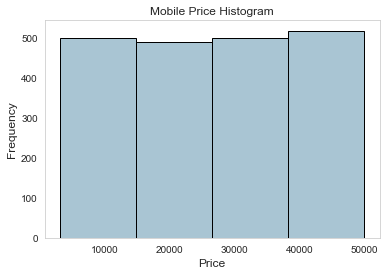

In [12]:
fig, ax = plt.subplots()
train_data["price"].hist(color='#A9C5D3', edgecolor='black',  
                          grid=False, bins=4)
ax.set_title('Mobile Price Histogram', fontsize=12)
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

There seems to be <b>four</b> bins present in the dataset. Lets try to create 4 bins and label them.

In [13]:
group_names = ['Low', 'Medium', 'High', 'Very_High']
data['price-binned'] = pd.cut(data['price'], 4, labels=group_names)
data[['price','price-binned']].tail(10)

,price,price-binned
1990,28817,High
1991,38301,Very_High
1992,25036,Medium
1993,18956,Medium
1994,9162,Low
1995,8053,Low
1996,47441,Very_High
1997,5795,Low
1998,30699,High
1999,31952,High


Lets confirm the categories present in the target variable.

In [14]:
data["price-binned"].unique()

[Low, Very_High, Medium, High]
Categories (4, object): [Low < Medium < High < Very_High]

In [15]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price', 'price-binned'],
      dtype='object')

### 3.4 Column Reduction (Target only)

As we have converted the price into the categories, so lets get rid of it from the normalized dataset.

In [16]:
data = data.drop(['price'], axis=1) 

In [17]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price-binned'],
      dtype='object')

# Primer on Decision Tree Classification

Classification is a two-step process, learning step and prediction step. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

![image.png](attachment:image.png)

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. Decision trees can handle high dimensional data with good accuracy.

The basic idea behind any decision tree algorithm is as follows:

1) Select the best attribute using Attribute Selection Measures(ASM) to split the records. <br>
2) Make that attribute a decision node and breaks the dataset into smaller subsets.<br>
3) Starts tree building by repeating this process recursively for each child until one of the condition will match:
- All the tuples belong to the same attribute value.
- There are no more remaining attributes.
- There are no more instances.

![image.png](attachment:image.png)

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are <br>
- Information Gain
- Gain Ratio
- Gini Index.

We will use following decistion tree for understanding feature selection process in more detail.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
def prepare_decision_tree(data, show_matrix=False, show_accuracy=True, show_report=False, show_visual=False):
    # Split the data into independent and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length - 1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
    
    #Construct decision tree
    dt = DecisionTreeClassifier(random_state=100)
    dt.fit(X_train, y_train)

    #Use the decision tree for prediction on test data
    y_pred = dt.predict(X_test)
    
    #Prepare the confusion matrix
    actuals = np.array(y_test)
    predictions = np.array(y_pred)
    
    if show_matrix:
        print("Confusion Matrix : ")
        print(confusion_matrix(actuals, predictions), "\n")

    #Compute accuracy 
    if show_accuracy:
        print ("Accuracy : ", accuracy_score(y_test,y_pred)*100, "\n") 

    #Generate classification report
    if show_report:
        print("Classification Report : \n", classification_report(y_test, y_pred), "\n") 

    #Show the important features visually
    if show_visual:
        importances=pd.Series(dt.feature_importances_, index=X.columns).sort_values()
        importances.plot(kind='barh', figsize=(12,8))
    
    return dt

In [22]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 

In [23]:
prepare_decision_tree(data)

Accuracy :  26.5 



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

Confusion Matrix : 
[[42 43 34 40]
 [40 35 40 35]
 [28 34 46 37]
 [46 32 33 35]] 

Accuracy :  26.333333333333332 

Classification Report : 
               precision    recall  f1-score   support

        High       0.27      0.26      0.27       159
         Low       0.24      0.23      0.24       150
      Medium       0.30      0.32      0.31       145
   Very_High       0.24      0.24      0.24       146

   micro avg       0.26      0.26      0.26       600
   macro avg       0.26      0.26      0.26       600
weighted avg       0.26      0.26      0.26       600
 



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

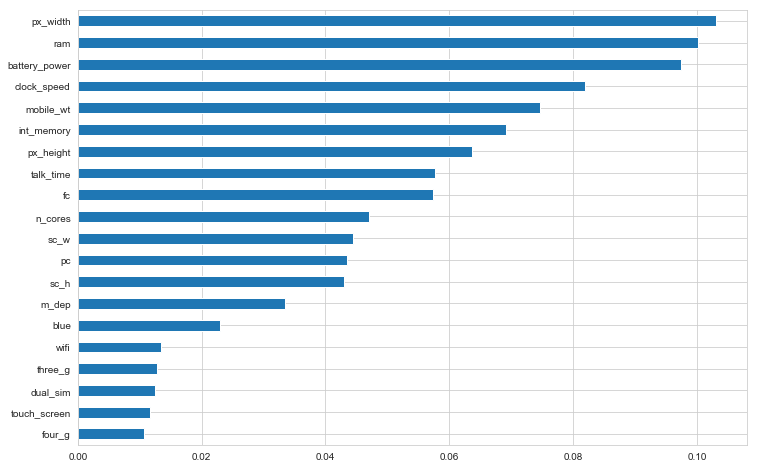

In [25]:
prepare_decision_tree(data, True, True, True, True)

More details can be found <a src="https://www.datacamp.com/community/tutorials/decision-tree-classification-python">here</a>.

# 4. Feature Subset Selection
![image.png](attachment:image.png)

Adapted from <a src="https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/"> this </a> article.

### 4.1 Feature Selection methods

The accuracy of machine learning models depends a lot on the features which goes into building those models. Otherwise its just garbage in , garbage out. Feature selection plays such a vital role in creating an effective predictive model. It is even more important when the number of features are very large. Not every feature will be playing the significant role in the prediction, so you don't need to bother about each and every attribute present at your disposal for creating an algorithm. You can assist your algorithm by feeding in only those features that are really important. You not only reduce the training time and the evaluation time as well.

Top reasons to use feature selection are:

- enables the machine learning algorithm to train faster
- reduces the complexity of a model and makes it easier to interpret
- improves the accuracy of a model if the right subset is chosen
- reduces overfitting

There are following three methods those are used for the feature selection : 
- Filter methods
- Wrapper methods
- Embedded methods

### 4.2 Filter Methods

![image.png](attachment:image.png)

These are generally used as a preprocessing step. The selection of features is not dependent of any machine learning algorithms. A lot of data exploration is done while using this method. Features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. 

Following table provides guidance on the type of method suitable for the type of attribute.
![image.png](attachment:image.png)

- Pearson’s Correlation: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. 
- LDA: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.
- ANOVA: ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.
- Chi-Square: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

<b>Filter methods do not remove multicollinearity, must need to deal with multicollinearity of features as well before training models for data.<b>

### 4.2.1. Univariate Filters 

Univariate filters evaluate each feature independently with respect to the target variable. 
- Mutual Information (Information Gain)
- Gini index
- Gain Ratio
- Chi-Squared test
- Fisher Score

Lets explore what different options are available in sklearn for the same.

In [24]:
from sklearn.feature_selection import SelectKBest
help(SelectKBest)

Help on class SelectKBest in module sklearn.feature_selection._univariate_selection:

class SelectKBest(_BaseFilter)
 |  Select features according to the k highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |  k : int or "all", optional, default=10
 |      Number of top features to select.
 |      The "all" option bypasses selection, for use in a parameter search.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feature scores, None if `score_func` returned only scores.
 |  
 |  Examples
 |  -------

The important score functions supported are :

- f_classif: ANOVA F-value between label/feature for classification tasks.
- mutual_info_classif: Mutual information for a discrete target.
- chi2: Chi-squared stats of non-negative features for classification tasks.
- f_regression: F-value between label/feature for regression tasks.
- mutual_info_regression: Mutual information for a continuous target.
- SelectPercentile: Select features based on percentile of the highest scores.
- SelectFpr: Select features based on a false positive rate test.
- SelectFdr: Select features based on an estimated false discovery rate.
- SelectFwe: Select features based on family-wise error rate.
- GenericUnivariateSelect: Univariate feature selector with configurable mode.

In [25]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [30]:
def show_top_univariate_filters(data, score_func, top_k):
    X = data.iloc[:,0:20]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if score_func == "chi2":
        func = chi2
    elif score_func == "f_classif":
        func = f_classif
    elif score_func == "mutual_info_classif":
        func = mutual_info_classif
    
    #apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=func, k=top_k)
    fit = bestfeatures.fit(X,y)

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(top_k,'Score'))  #print 10 best features

In [31]:
show_top_univariate_filters(data, 'chi2', 5)

            Specs        Score
11      px_height  2033.383006
0   battery_power   918.479571
13            ram   500.179498
12       px_width   203.596995
4              fc    52.696243


In [34]:
show_top_univariate_filters(data, 'f_classif', 5)

            Specs     Score
4              fc  4.034505
11      px_height  2.224286
0   battery_power  1.966637
18   touch_screen  1.621116
10             pc  1.331369


<b> The most significant attributes seems to be "px_height", "battery_power" and "fc". <b>

### 4.2.2 Correlation Matrix with Heatmap

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation.
Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable. 
The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

The relationship between the independent attributes also can help to identify the redundant attributes which further can be removed to limit the feature space. Lets have a look at this technique.

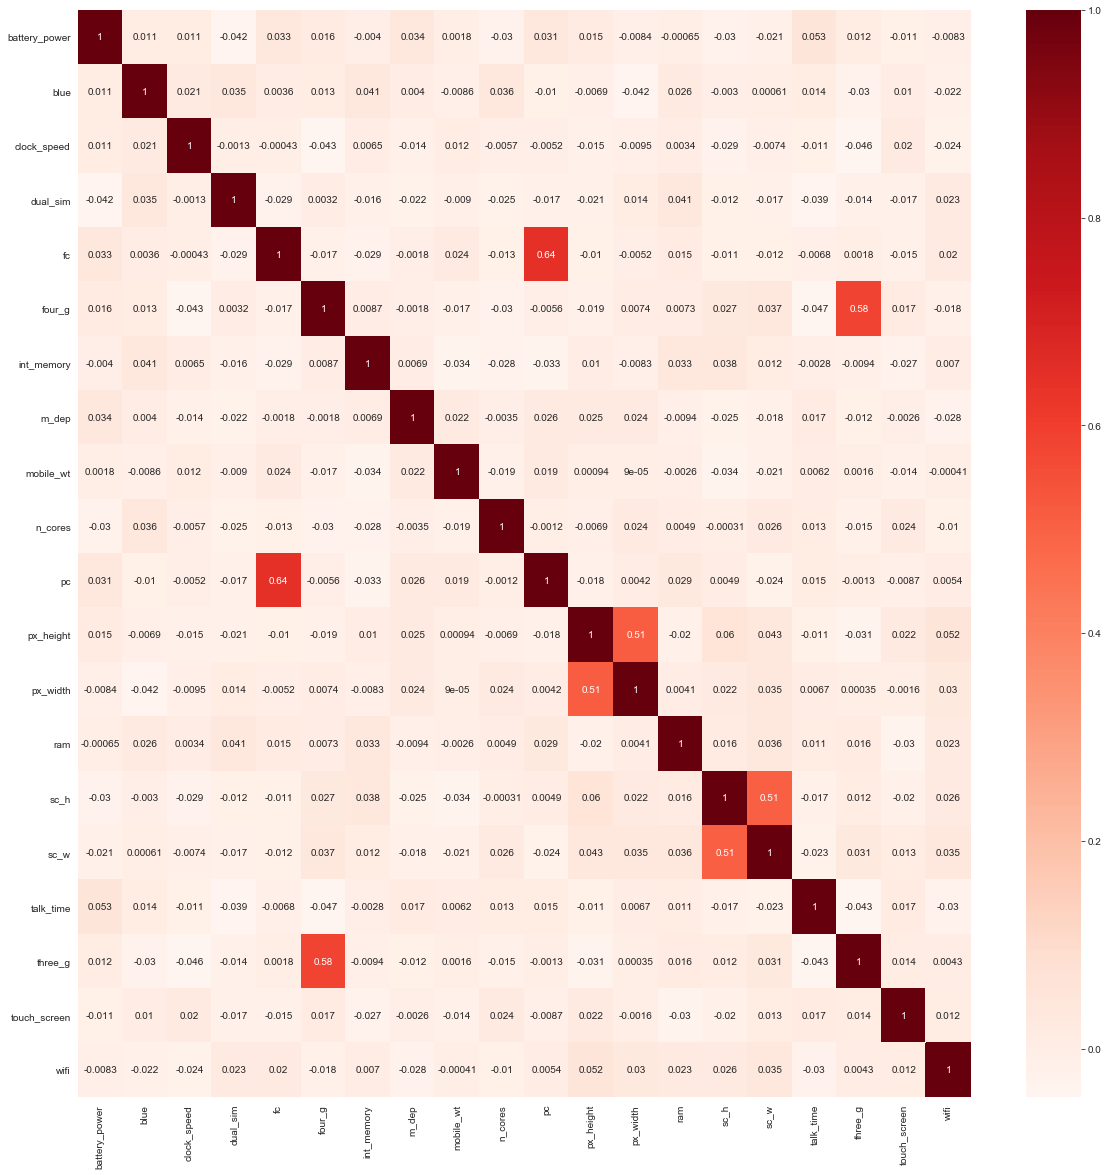

In [35]:
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(20,20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

Few observations :
- "pc" and "fc" are correlated , hence one of them can be ignored while model building
- "three_g" and "four_g" are correlated , hence one of them can be ignored while model building
- "px_height" and "px_width" are correlated , hence one of them can be ignored while model building
- "sc_w" and "sc_h" are correlated , hence one of them can be ignored while model building

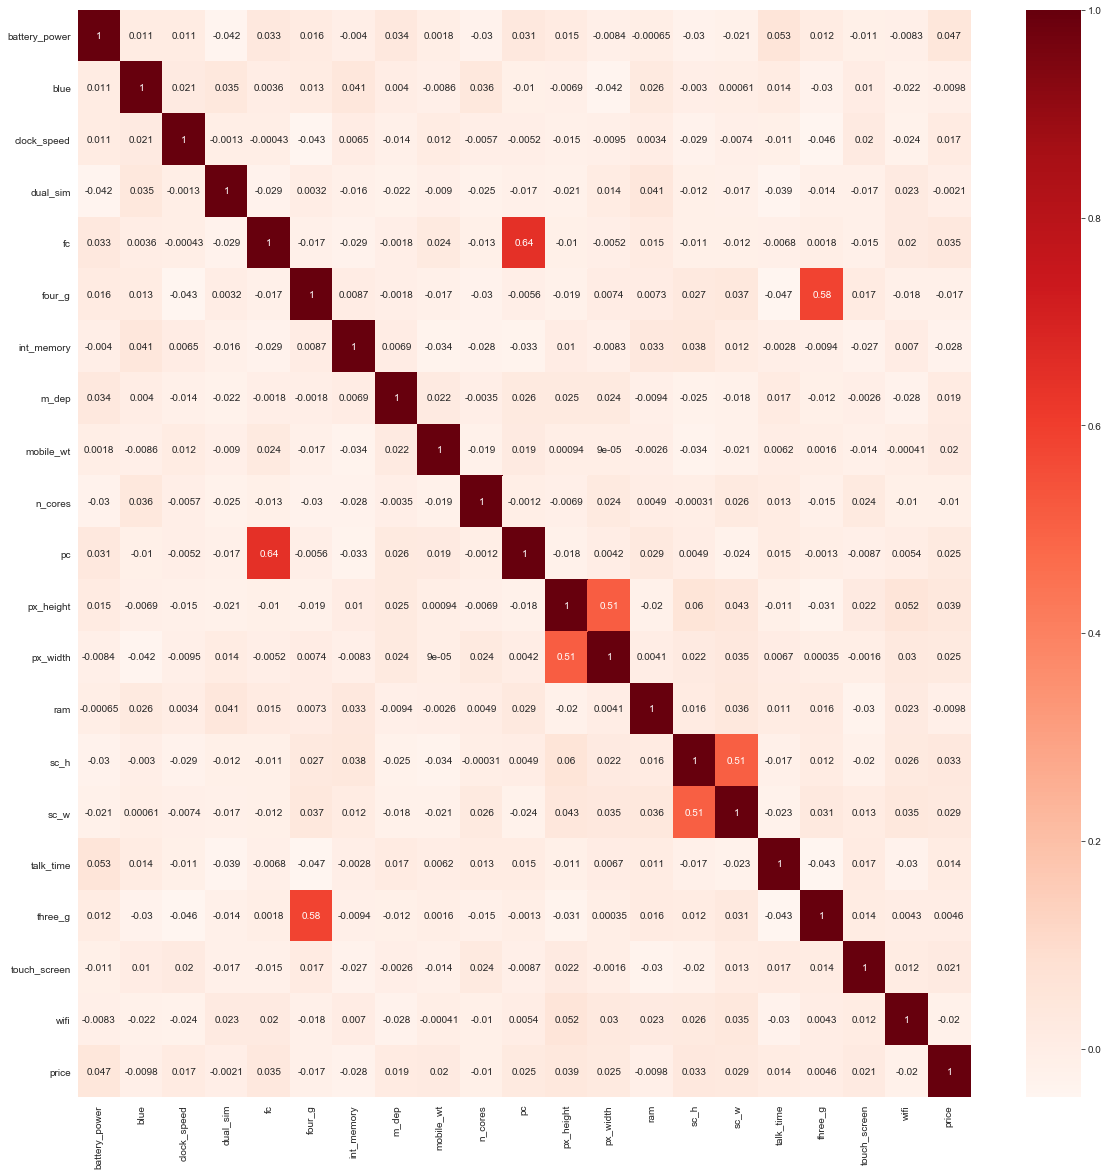

In [36]:
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index

#plot heat map
plt.figure(figsize=(20,20))
sns.heatmap(train_data[top_corr_features].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

The correlated features with respect to the target "price" : 
- blue
- dual sim
- four_g
- int_memory
- n_cores
- ram
- wifi


### 4.2.3 Using Feature Importance

As we are trying out classification problem, the classification implementations provides a built-in feature ranking mechanism, lets try that out with one of the decision tree classfier.

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
import matplotlib.pyplot as plt

In [35]:
def show_top_decition_classifier_feature(data, classifier, top_k):
    #Prepare the independent and dependent attributes sets
    X = data.iloc[:,0:20]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    if classifier == "ExtraTreesClassifier":
        classifier = ExtraTreesClassifier
    elif classifier == "DecisionTreeClassifier":
        classifier = DecisionTreeClassifier
       
    model = classifier()
    model.fit(X,y)

    #use inbuilt class feature_importances of tree based classifiers
    print(model.feature_importances_) 

    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(top_k).plot(kind='barh')
    plt.show()

[0.09088667 0.0160167  0.0729257  0.01629729 0.04084086 0.01374158
 0.07128564 0.03135066 0.08522151 0.04632654 0.05556423 0.0788389
 0.08476787 0.09276355 0.05347752 0.05697056 0.04917234 0.01534312
 0.0154308  0.01277794]


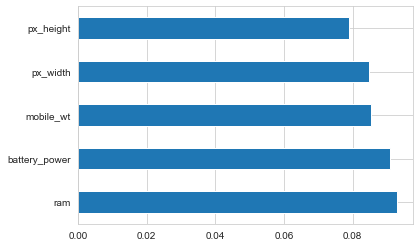

In [36]:
show_top_decition_classifier_feature(data, "DecisionTreeClassifier", 5)

[0.06172615 0.02707216 0.05946905 0.03002141 0.05632706 0.02840527
 0.06094368 0.05764399 0.0615374  0.05791898 0.06027185 0.06339898
 0.06103933 0.06294344 0.05831218 0.05822143 0.06101994 0.01845204
 0.0252057  0.03006992]


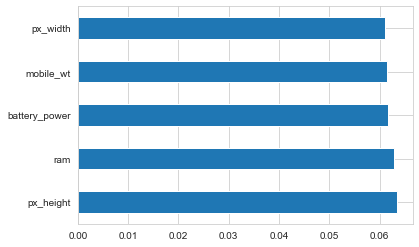

In [37]:
show_top_decition_classifier_feature(data, "ExtraTreesClassifier", 5)

<b>The most significant attributes seems to be "battery_power", "ram", "mobile_wt" and "px_height"</b>

### 4.3 Wrapper Methods

![image.png](attachment:image.png)

In wrapper methods, a subset of features is used to train a model. Based on the inferences drawnfrom the previous model, needs to decide whether to add or remove features from feature subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

Some common examples of wrapper methods are backward feature elimination, forward feature selection, recursive feature elimination, etc.

- Backward Elimination: The backward elimination starts with all the features and removes the least significant feature at each iteration which improves the performance of the model. This is repeated  until no improvement is observed on removal of features.
- Forward Selection: Forward selection is an iterative method which starts with having no feature in the model. In each iteration, a new feature is added to see if it improves the model. Its repeated till an addition of a new variable does not improve the performance of the model.
- Recursive Feature elimination: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

### 4.3.1. Backward Elimination Method

The backward elimination starts with all the features and removes the least significant feature at each iteration which improves the performance of the model. This is repeated until no improvement is observed on removal of features.

Lets write a function that will help us to try out Backward Feature Elimination, It will accept a dataset and list of features that needs to be dropped in an iteration.

In [38]:
def predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual):
    #Prepare the dataset by removing the features mentioned
    for feature in features_to_be_removed:
        data = data.drop(feature, axis=1)

    #Call Decision tree function to get the accuracy results
    prepare_decision_tree(data, show_visual = show_visual)  

Lets see the accuracy score with all features present i.e. feature removal list is empty.

Accuracy :  24.666666666666668 



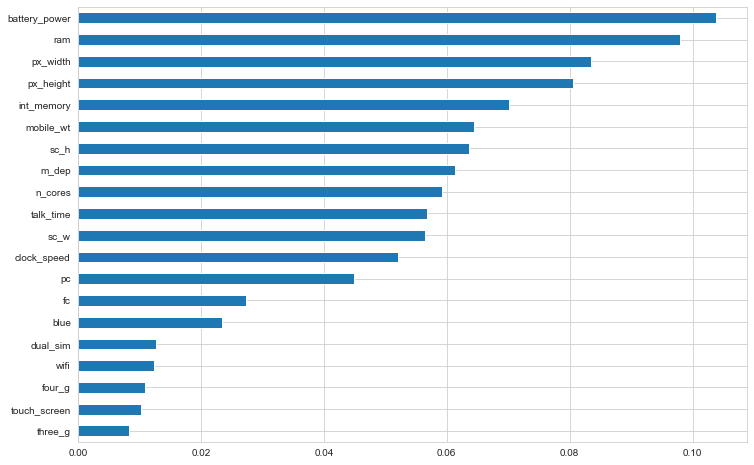

In [43]:
features_to_be_removed = []
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

"dual_sim" and "four_g" seems to have little impact on the model performance. Lets try to remove them. 

Accuracy :  26.833333333333332 



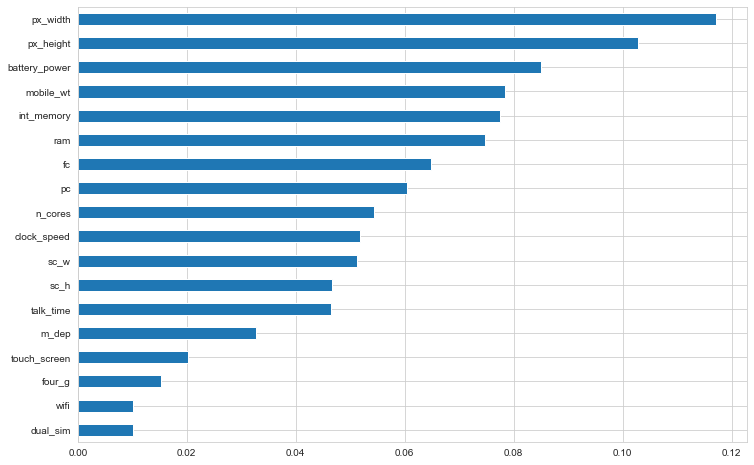

In [44]:
features_to_be_removed = ["three_g", "blue"]
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

Accuracy decreased so lets try them one by one. 

Accuracy :  26.0 



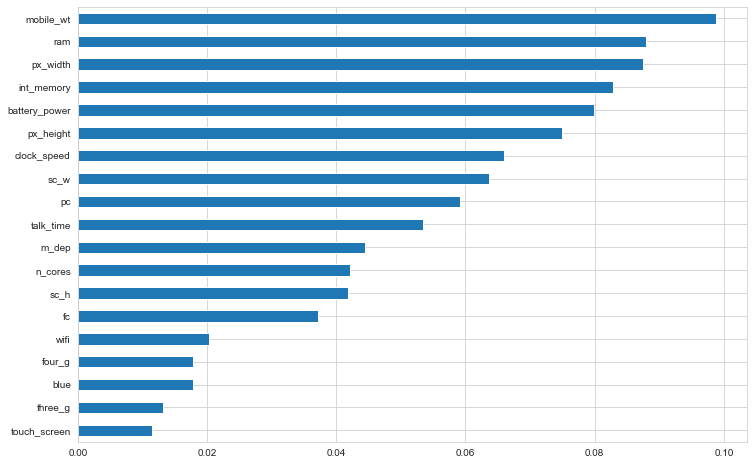

In [45]:
features_to_be_removed = ["dual_sim"]
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

Accuracy :  26.5 



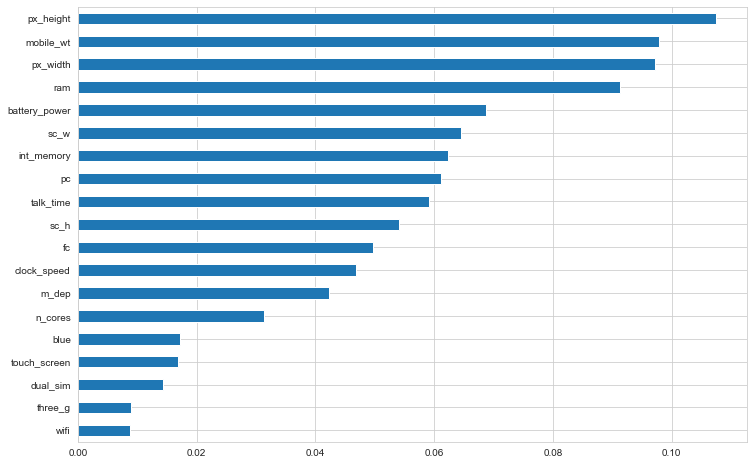

In [46]:
features_to_be_removed = ["four_g"]
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

When "dual_sim" is removed, the accuracy is improved but when "four_g" is removed, then accuray decreased, which means "four_g" cant be ignored. 

When "dual_sim" is removed, the next least significant attribute seems to be "wifi", lets try removing it.

Accuracy :  25.833333333333336 



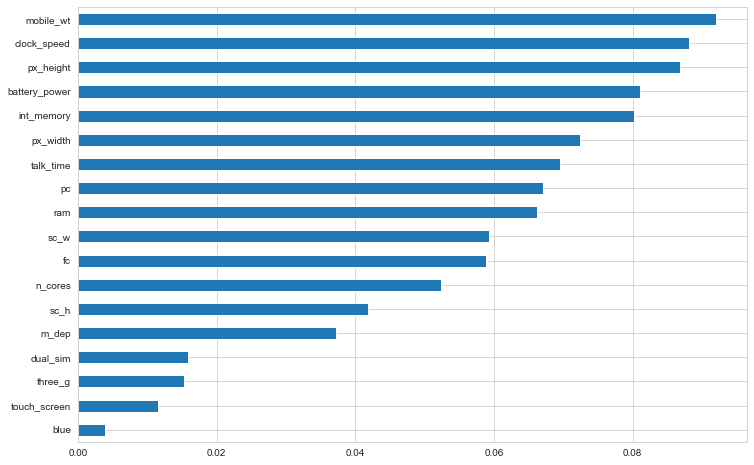

In [47]:
features_to_be_removed = ["four_g", "wifi"]
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

We can try out the other combinations of the attributes and see its effect on the accuracy.

Accuracy :  24.666666666666668 



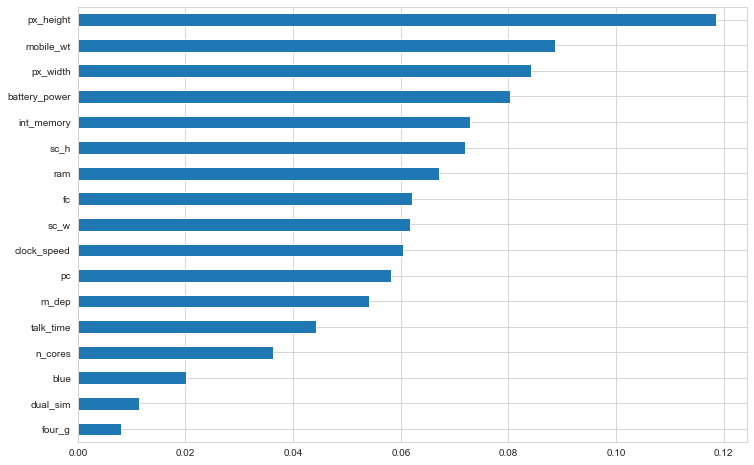

In [48]:
features_to_be_removed = ['three_g', 'wifi', 'touch_screen']
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

Accuracy :  25.166666666666664 



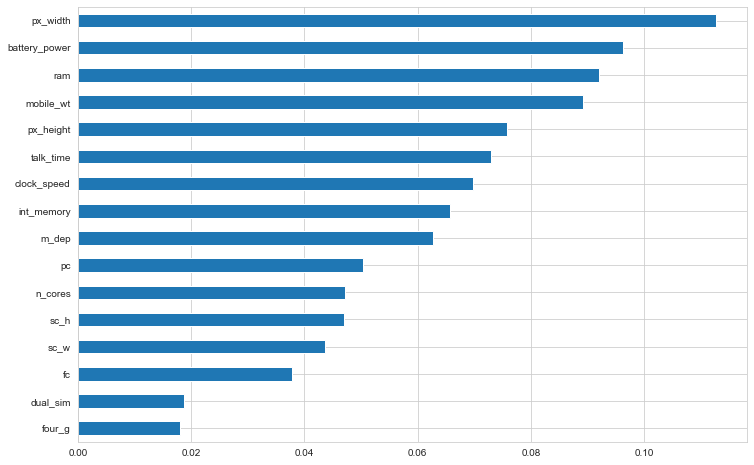

In [49]:
features_to_be_removed = ['three_g', 'wifi', 'touch_screen', 'blue']
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

Accuracy :  21.833333333333332 



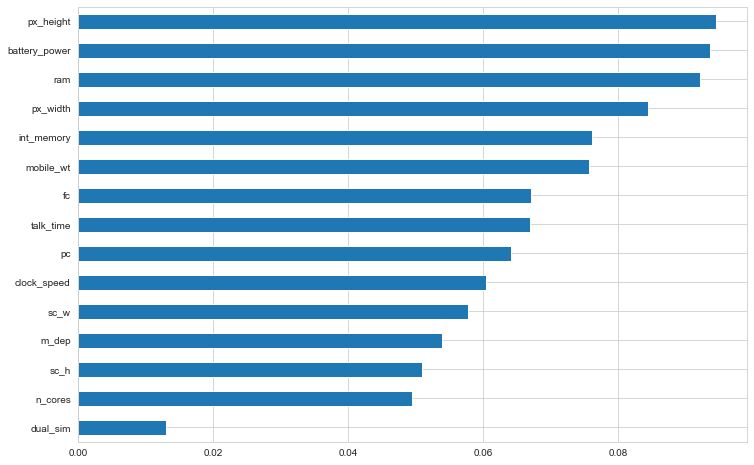

In [50]:
features_to_be_removed = ['three_g', 'wifi', 'touch_screen', 'blue', 'four_g']
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

Accuracy :  23.666666666666668 



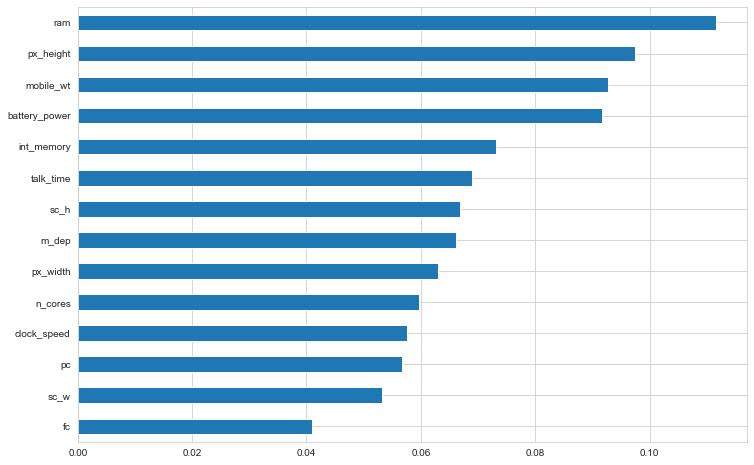

In [51]:
features_to_be_removed = ['three_g', 'wifi', 'touch_screen', 'blue', 'four_g', 'dual_sim']
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

Accuracy :  23.166666666666664 



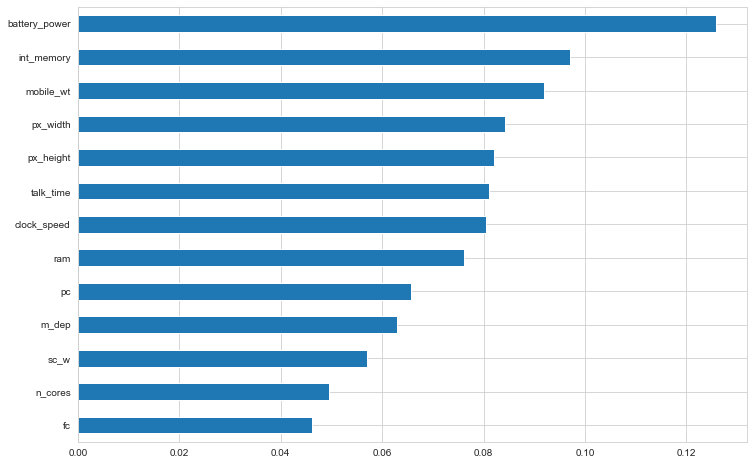

In [53]:
features_to_be_removed = ['three_g', 'wifi', 'touch_screen', 'blue', 'four_g', 'dual_sim', 'sc_h']
predict_accuracy_by_feature_elimination(data, features_to_be_removed, show_visual=True)

### 4.3.2. Backward Elimination Method using "mlxtend"

But next question in your mind, what if the attribute space is too wide then this iterative approach will become cumborsome to follow. Is there anything else that can simplify the feature selection process. Fortunately, we have a library that can be used for this purpose, named "mlxtend".

In [ ]:
#execute only first time
!pip install mlxtend 

First we need to obtain an instance of Decision tree on which feature selection approaches can be tried out. 

In [54]:
dt = prepare_decision_tree(data, show_visual = False) 

Accuracy :  24.5 



Lets use the function from mlxtend to obtain the best features list.

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [56]:
def get_top_k_features_by_mlxtend(data, dt, top_k, forward=True, cv_cnt=0, show_results=True):
    #Preprare the independant and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range
    
    #Prepare a model using the specified feature selection method 
    sfs_model = SFS(dt, 
                   k_features=top_k, 
                   forward=forward, 
                   floating=False, 
                   verbose=2,
                   scoring='accuracy',
                   cv=cv_cnt)
    
    #Lets fit the model and identify the features
    sfs_model = sfs_model.fit(X, y)
    
    #Show outcomes
    #print("Subsets : \n", sfs_model.subsets_ , "\n")
    if show_results:
        print("Score : " , sfs_model.k_score_, "\n")
        print("Top" , top_k , " Feature Names : " , sfs_model.k_feature_names_, "\n")
    
    return sfs_model

In [52]:
get_top_k_features_by_mlxtend(data, dt, 3, forward=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished

[2019-12-29 11:42:22] Features: 19/3 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.7s finished

[2019-12-29 11:42:22] Features: 18/3 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2019-12-29 11:42:23] Features: 17/3 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

Score :  0.999 

Top 3  Feature Names :  ('battery_power', 'clock_speed', 'int_memory') 



SequentialFeatureSelector(clone_estimator=True, cv=0,
             estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
             floating=False, forward=False, k_features=3, n_jobs=1,
             pre_dispatch='2*n_jobs', scoring='accuracy', verbose=2)

In [58]:
get_top_k_features_by_mlxtend(data, dt, 5, forward=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished

[2020-01-12 20:33:04] Features: 19/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2020-01-12 20:33:04] Features: 18/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished

[2020-01-12 20:33:05] Features: 17/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

Score :  1.0 

Top 5  Feature Names :  ('battery_power', 'blue', 'clock_speed', 'fc', 'int_memory') 



[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2020-01-12 20:33:07] Features: 7/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2020-01-12 20:33:07] Features: 6/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2020-01-12 20:33:07] Features: 5/5 -- score: 1.0

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort

More details on "mlxtend" can be found <a src="https://github.com/rasbt/mlxtend"> here</a>.

### 4.3.3 Forward Feature Selection using "mlxtend"

Forward selection is an iterative method which starts with having no feature in the model. In each iteration, a new feature is added to see if it improves the model. Its repeated till an addition of a new variable does not improve the performance of the model.

Lets use the same function which we have defined earlier for feature selection using mlxtend to obtain the best features list but with "forward selection" technique.

In [59]:
get_top_k_features_by_mlxtend(data, dt, 5, forward=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished

[2020-01-12 20:33:49] Features: 1/5 -- score: 0.847[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished

[2020-01-12 20:33:49] Features: 2/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2020-01-12 20:33:50] Features: 3/5 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:   

Score :  1.0 

Top 5  Feature Names :  ('battery_power', 'blue', 'clock_speed', 'dual_sim', 'ram') 



[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.2s finished

[2020-01-12 20:33:50] Features: 5/5 -- score: 1.0

SequentialFeatureSelector(clone_estimator=True, cv=0,
                          estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           presort

### 4.3.4. RFE

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You can learn more about the <a src="https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE">RFE</a> class in the scikit-learn documentation.

The example below uses RFE with the decission tree algorithm to select the top k features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [60]:
from sklearn.feature_selection import RFE

In [61]:
def get_top_k_features_by_rfe(data, dt, top_k, show_results=True):
    #Preprare the independant and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length-1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Initializing RFE model
    rfe = RFE(dt, top_k)

    #Transforming data using RFE
    X_rfe = rfe.fit_transform(X,y)  
    
    #Fitting the data to model
    model = dt.fit(X_rfe,y)
    
    #Prepare top k feature list 
    indx= 0 
    feature_list = []
    for col in X.columns:
        if rfe.ranking_[indx] == 1:
            feature_list.append(col)
        indx = indx + 1
    
    if show_results:
        print("Num Features: %d\n" % rfe.n_features_)
        print("Selected Features :" , feature_list)
        #print("Feature Ranking: %s" % rfe.ranking_)  

    return feature_list

In [62]:
get_top_k_features_by_rfe(data, dt, 5, show_results=True)

Num Features: 5

Selected Features : ['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']

In [ ]:
feature_list= get_top_k_features_by_rfe(data, dt, 7, show_results=True)

### 4.4 Embedded techniques

![image.png](attachment:image.png)

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

In the classificaiton problems, another type of technique called "ensembling" is used which helps to improve the accuracy of prediction by using more than one models. These are not really embedded techniques but can be correlated with them as they also help to improve the prediction accuracy by affecting the performane of sequence/collection of models. 

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

- In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.<br>
Examples: Bagging methods, Forests of randomized trees, … <br>

- By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.<br>
    Examples: AdaBoost, Gradient Tree Boosting, …

More details can be obtained <a src="https://scikit-learn.org/stable/modules/ensemble.html"> here</a>.

### 4.4.1 Bagging

The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method, specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

Lets try to build a bagging classifier using the decision tree that we have obtained earlier. 

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
def get_bagging_classifier(data):
    # Split the data into independent and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length - 1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
    
    forests = RandomForestClassifier(n_estimators=100, random_state=100)
    forests.fit(X_train, y_train)
    print(forests.score(X_test, y_test))  
    
    return forests

In [71]:
get_bagging_classifier(data)

0.26166666666666666


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

### 4.4.2 Boosting

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. 

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [69]:
def get_boosting_classifier(data):
    # Split the data into independent and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length - 1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
    clf = AdaBoostClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    print("Score : " , clf.score(X_test, y_test))

    print("Feature Importance : \n", clf.feature_importances_)

    importances=pd.Series(clf.feature_importances_, index=X_train.columns).sort_values()
    importances.plot(kind='barh', figsize=(12,8))

    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Score after cross validation : ", scores.mean())
    
    return clf

Score :  0.24333333333333335
Feature Importance : 
 [0.13 0.   0.03 0.   0.03 0.   0.04 0.05 0.08 0.02 0.02 0.2  0.14 0.07
 0.05 0.06 0.06 0.01 0.01 0.  ]
Score after cross validation :  0.24928571428571428


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

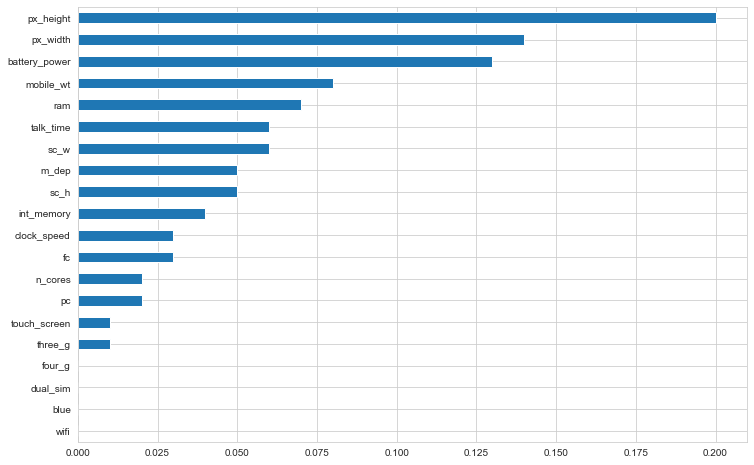

In [70]:
get_boosting_classifier(data)

Lets try the model building with another advanced algorithm i.e. GradientBoostingClassifier.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def get_gradient_boosting_classifier(data):
    
    # Split the data into independent and target attributes
    col_length = len(data.columns)
    X = data.iloc[:,0:col_length - 1]  #independent columns
    y = data.iloc[:,-1]    #target column i.e price range

    #Split the data into training and testing set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)    
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    print("Score : " , clf.feature_importances_)

    importances=pd.Series(clf.feature_importances_, index=X_train.columns).sort_values()
    importances.plot(kind='barh', figsize=(12,8))
    
    return clf

In [ ]:
get_gradient_boosting_classifier(data)

### 4.5 Difference between Filter and Wrapper methods

The main differences between the filter and wrapper methods for feature selection are:

- Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
- Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
- Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.
- Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
- Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.

# 5. What are the three best features?

Type your answer here :
    - 1) 
    - 2) 
    - 3) 